### Results
 - [UniVariate Analysis](#Uni-Variate-Observations)
 - [BiVariateAnalysis](#Bi-Variate-Observations)


[References](#References)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### to remove ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('loan.csv')

# Cleaning Dataset

In [3]:
dataset.shape

(39717, 111)

In [4]:
dataset.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Looks like dataset is having lot of Null values, lets look into them

In [5]:
dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### here we can observer that given dataset is having empty/null values, remove them first
 - remove the columns having all null values across all the rows
 - inplace the result dataset
 
 **Note: here we have to specify the how="all" in dropna method, because by default it how="any" which means remove the whole columns if any one of the row has null value (this is dangerous/leads to incorrect data)[ref](#References)**

In [6]:
dataset.dropna(axis=1, how="all", inplace=True)

In [7]:
dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### from the above information, following fields are out of analysis
 - url
 - title
 - emp_title
 - zip_code
 - addr_state
 - desc
 
 **Deleting the above columns**

In [8]:
dataset.drop(["url","title", "emp_title", "zip_code","addr_state","desc"], axis=1, inplace=True)

In [9]:
dataset.shape

(39717, 51)

## Removing un-neccessary columns

### some of the columns contains the unique value for all rows, such columns are not useful for analysis
**filtering the unique values of all columns and its length == 1**
 - pymnt_plan
 - initial_list_status
 - policy_code
 - application_type
 - acc_now_delinq
 - delinq_amnt
 
**following columns are not useful for analysis**
 - tax_liens
 - pub_rec_bankrupties
 - chargeoff_within_12_mths
 - last_pymnt_d
 - next_pymnt_d

In [10]:
# function to find unique values
drop_list_1 = list()
for i in dataset.columns:
    if len(dataset[i].unique())==1:
        drop_list_1.append(i)
        
drop_list_1

['pymnt_plan',
 'initial_list_status',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'delinq_amnt']

In [11]:
dataset.drop(drop_list_1, axis=1, inplace=True)
dataset.drop(["tax_liens", "pub_rec_bankruptcies", "chargeoff_within_12_mths", "collections_12_mths_ex_med", "last_credit_pull_d", "last_pymnt_d"], axis=1, inplace=True)
dataset.shape

(39717, 39)

In [12]:
dataset.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymn

### from the above result the following columns are having null values nearest to the number of records in dataset
 - next_pymnt_d
 - mths_since_last_deling
 - mths_since_last_record
 
**deleting these records**

In [13]:
dataset.drop(["next_pymnt_d", "mths_since_last_delinq", "mths_since_last_record"], axis=1, inplace=True)
dataset.shape

(39717, 36)

### Checking for Missing Values

In [14]:
dataset.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

### there are two columns having missing values
 - emp_length
 - revol_util

- lets find out the most occurance value of these two columns

In [15]:
# dataset['emp_length'].value_counts()
dataset.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

- lets fill the missing values of emp_length with 10+ years

In [16]:
dataset.emp_length.fillna(dataset.emp_length.mode()[0], inplace=True)
dataset.emp_length.isna().sum()

0

- lets doo same thing for `revol_util` column

In [17]:
dataset.revol_util.fillna(dataset.revol_util.mode()[0], inplace=True)
dataset.revol_util.isna().sum()

0

In [18]:
dataset.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

- AS per the problem statement we only require `charge_off` and `fulypaid` from `loan_status` column for our analysis

In [19]:
dataset.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [20]:
dataset = dataset[dataset.loan_status != 'Current']
dataset.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Standardizing Dataset

In [21]:
dataset.shape

(38577, 36)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_length               38577 non-null  object 
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  issue_d               

### observation from previous analysis
 - `revol_util` has the `%` represensents it is not an standardised value
 - similarly for `int_rate`
 - in `emp_length` 10+ years treated as `10` and <1 treated as `0`
 - `sub_grade` is related to `grade` column to considering only numeric values for `sub_grade`

In [23]:
# function to split '%'
def std_percentile(x):
    return x.split('%')[0]

In [24]:
dataset.revol_util = pd.to_numeric(dataset.revol_util.apply(std_percentile))
dataset.int_rate = pd.to_numeric(dataset.int_rate.apply(std_percentile))

In [25]:
dataset.emp_length = pd.to_numeric(dataset.emp_length.apply(lambda x: 0 if '< 1' in x else (x.split('+')[0] if '+' in x else x.split()[0])))

In [26]:
#B2
#01
dataset.sub_grade = pd.to_numeric(dataset.sub_grade.apply(lambda x: x[-1]))

In [27]:
dataset.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,2,...,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,4,...,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,5,...,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,1,...,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,4,...,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,5,...,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,1,...,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,111.34
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,2,...,0.0,0.0,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,152.39
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,5,...,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,121.45
10,1070078,1305201,6500,6500,6500.0,60 months,14.65,153.45,C,3,...,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.00,1655.54


### from the resultant dataset it looks like we still have columns with unique values (remove them)
 - out_prncp
 - out_prncp_inv

**Unique values occuring now beause we have only fetched the columns with `charged_off` or `fullypaid`**

In [28]:
# function to find unique values
drop_list_1 = list()
for i in dataset.columns:
    if len(dataset[i].unique())==1:
        drop_list_1.append(i)
        
drop_list_1

['out_prncp', 'out_prncp_inv']

In [29]:
dataset.drop(drop_list_1, axis=1, inplace=True)
dataset.shape

(38577, 34)

## Outlier Treatment
 - taking only inlier data for breif analysis

In [30]:
dataset.max()

id                             1077501
member_id                      1314167
loan_amnt                        35000
funded_amnt                      35000
funded_amnt_inv                35000.0
term                         60 months
int_rate                          24.4
installment                    1305.19
grade                                G
sub_grade                            5
emp_length                          10
home_ownership                    RENT
annual_inc                   6000000.0
verification_status           Verified
issue_d                         Sep-11
loan_status                 Fully Paid
purpose                        wedding
dti                              29.99
delinq_2yrs                         11
earliest_cr_line                Sep-99
inq_last_6mths                       8
open_acc                            44
pub_rec                              4
revol_bal                       149588
revol_util                        99.9
total_acc                

- out from this data `annual_inc` has the higher value compared to all columns
- lets use this column for outlier treatment

<AxesSubplot:>

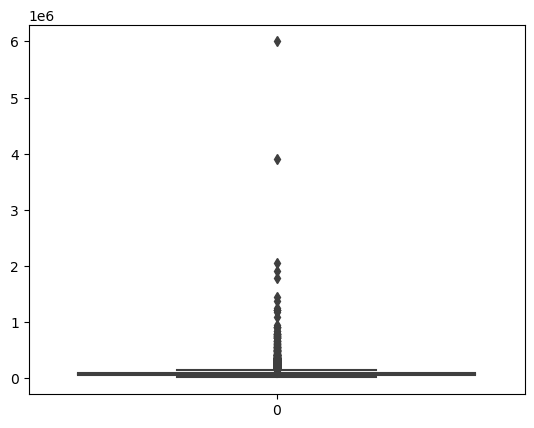

In [31]:
sns.boxplot(dataset.annual_inc)

### indicating the presence of outlier
 - quantile information has the accurate information
 - lets use quantile to take an appropriate action
 - its looks like data is disconnecting after 95 percentile
 - so, our threshold is `0.95`

In [32]:
dataset.annual_inc.quantile([0.5, 0.75, 0.85, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.99])

0.50     58868.0
0.75     82000.0
0.85    100000.0
0.90    115000.0
0.91    120000.0
0.92    122000.0
0.93    127500.0
0.94    134000.0
0.95    140004.0
0.96    150000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [33]:
dataset.annual_inc.quantile(0.95)

140004.0

In [34]:
dataset = dataset[dataset.annual_inc <= 140004.0]

<AxesSubplot:>

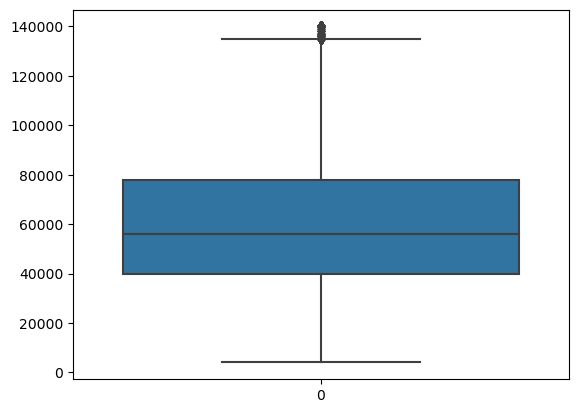

In [35]:
sns.boxplot(dataset.annual_inc)

### move onto next step
- filter the data again from which useful columns having higher values
- loan_amnt
- funded_amnt_inv

<AxesSubplot:>

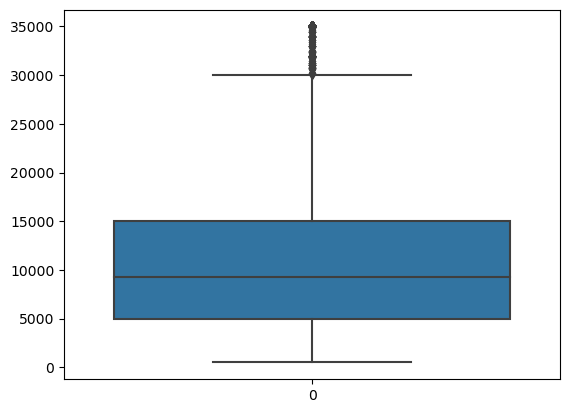

In [36]:
sns.boxplot(dataset.loan_amnt)

<AxesSubplot:>

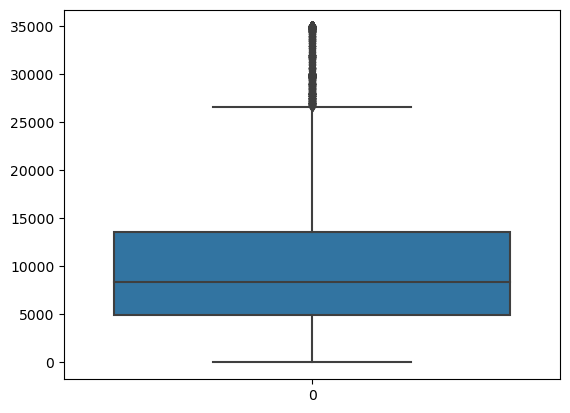

In [37]:
sns.boxplot(dataset.funded_amnt_inv)

- so, there are some outliers but no need to remove, because the data is already consistent for analysis

## Visualizing Data

<AxesSubplot:xlabel='loan_status', ylabel='count'>

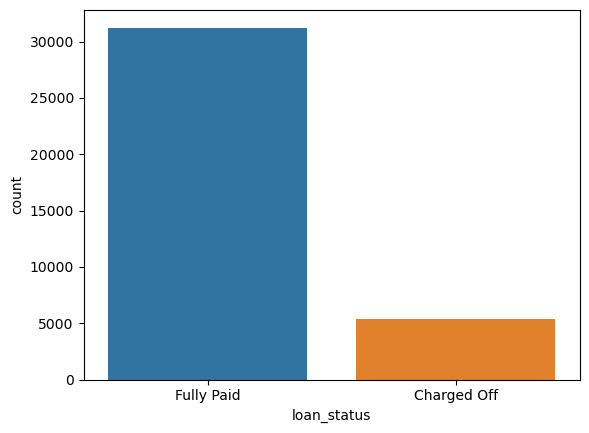

In [38]:
sns.countplot(x= 'loan_status', data=dataset)

### Lets split this data so, we can only perform analysis based on category

In [39]:
fully_paid = dataset[dataset.loan_status=="Fully Paid"]
charged_off = dataset[dataset.loan_status=="Charged Off"]

## Observations based on annual_inc
- when `annual_inc` is taken into consideration

 **Charge Off**
 - people with income range `30k-60k` is more likely to default `Charge Off`

In [67]:
charged_off['annual_inc_range'] = pd.cut(charged_off.annual_inc, bins=10,precision=0,labels =['0k-15k','15k-30k','30k-45k','45k-60k','60k-75k', '75k-90k', '90k-105k', '105k-120k', '120k-135k', '135k-150k'])

<AxesSubplot:xlabel='count', ylabel='annual_inc_range'>

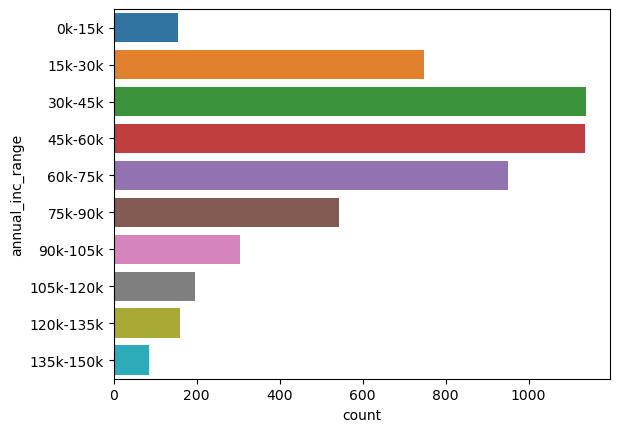

In [41]:
sns.countplot(y='annual_inc_range', data=charged_off)

## Observation based on loan_amnt
- when `loan_amnt` is taken into consideration

 **Charge Off**
 - people with sanctioned loan of `5k-10k` is more likely to default `Charge Off`
 - people who sanctioned with `17500 - 20000` and having an annual income of `105k-135k` are more likely to default.

In [42]:
charged_off.loan_amnt.max()

35000

In [68]:
charged_off['loan_amnt_range'] =  pd.cut(charged_off.loan_amnt, bins=7,precision=0,labels =['0k-5k','5k-10k','10k-15k','15k-20k','20k-25k', '25k-30k', '30k-35k'])

<AxesSubplot:xlabel='count', ylabel='loan_amnt_range'>

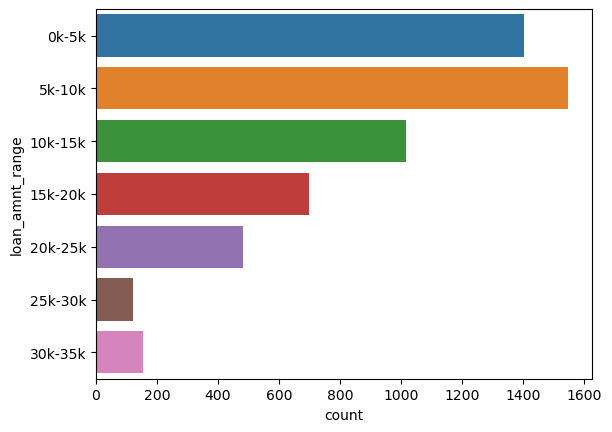

In [44]:
sns.countplot(y=charged_off.loan_amnt_range, data=charged_off)

<AxesSubplot:xlabel='loan_amnt', ylabel='annual_inc_range'>

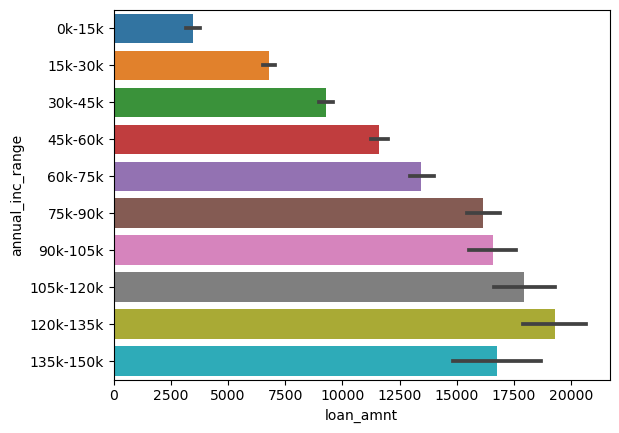

In [45]:
sns.barplot(y='annual_inc_range', x='loan_amnt', data=charged_off)

## Observations based on term
- when `term` is taken into consideration

 **Charge Off**
 - people with loan term of `36 months` is more likely to default `Charge Off`
 - people with loan_amnt `14k-16k` with term period of `60 months` are more likely to default.

<AxesSubplot:xlabel='term', ylabel='count'>

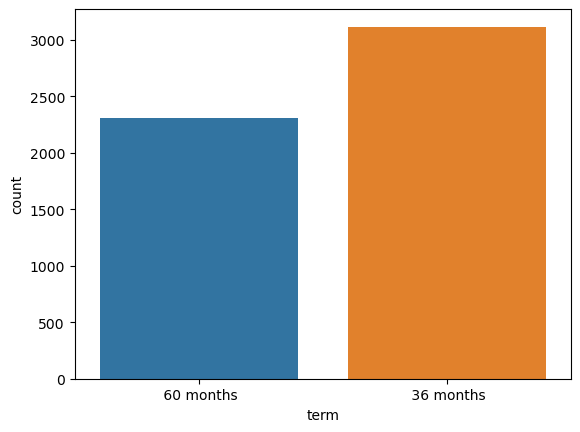

In [46]:
sns.countplot(x='term', data=charged_off)

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

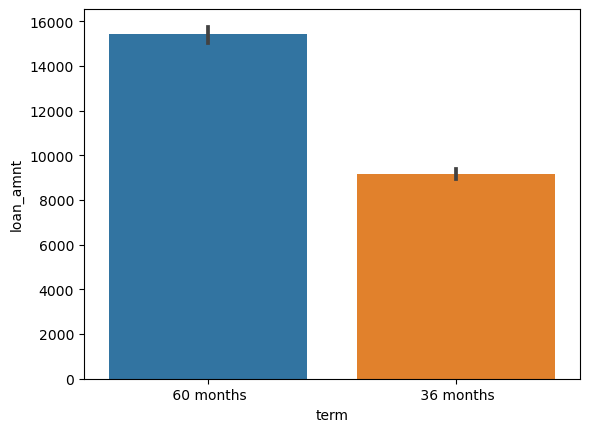

In [47]:
sns.barplot(x='term', y='loan_amnt', data=charged_off)

## Observation based on verification_status
- when `verification_status` is taken into consideration

 **Charge Off**
 - people `Not Verified` are more likely to default `Charge Off`
 - people `Verified` and with `60k+` annual_inc are more likely to default.

In [48]:
charged_off.verification_status.unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

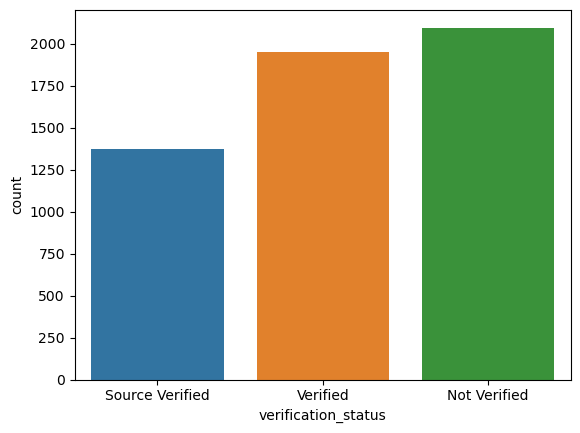

In [49]:
sns.countplot(x='verification_status', data=charged_off)

<AxesSubplot:xlabel='verification_status', ylabel='annual_inc'>

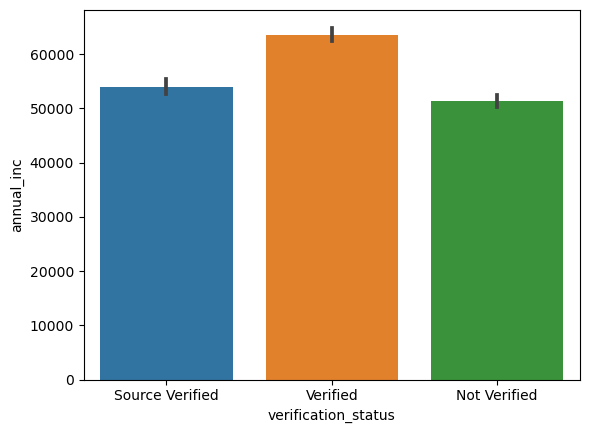

In [50]:
sns.barplot(x='verification_status', y='annual_inc', data=charged_off)

## Observation based on int_rate
- when `int_rate` is taken into consideration

 **Charge Off**
 - people with interest rate of `13%-17%` is more likely to default `Charge Off`
 - people with loan_amnt `20k-35k` with int_rate of `15%-17%` are more likely to default.

In [69]:
charged_off['int_rate_range'] =  pd.cut(charged_off.int_rate, bins=5,precision=0,labels =['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

<AxesSubplot:xlabel='int_rate_range', ylabel='count'>

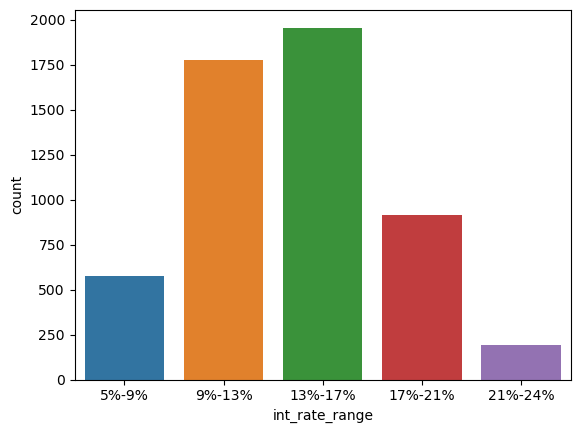

In [52]:
sns.countplot(x='int_rate_range', data=charged_off)

<AxesSubplot:xlabel='int_rate', ylabel='loan_amnt_range'>

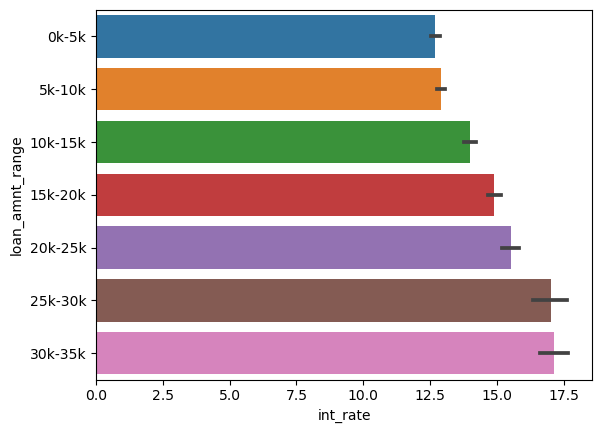

In [53]:
sns.barplot(x='int_rate', y="loan_amnt_range", data=charged_off)

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

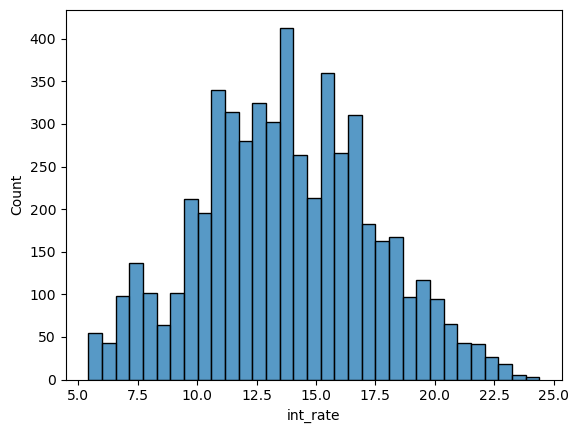

In [54]:
sns.histplot(charged_off.int_rate)

## Observation based on emp_length
- when `emp_length` is taken into consideration

 **Charge Off**
 - people with experience of `10/10+` years is more likely to default `Charge Off`
 - people with `10` years of exp and having `12k-14k` loan_amnt are more likely to default.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

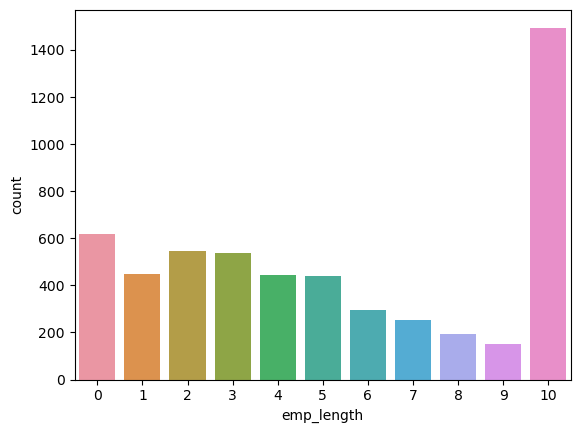

In [73]:
sns.countplot(x='emp_length', data=charged_off)

<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

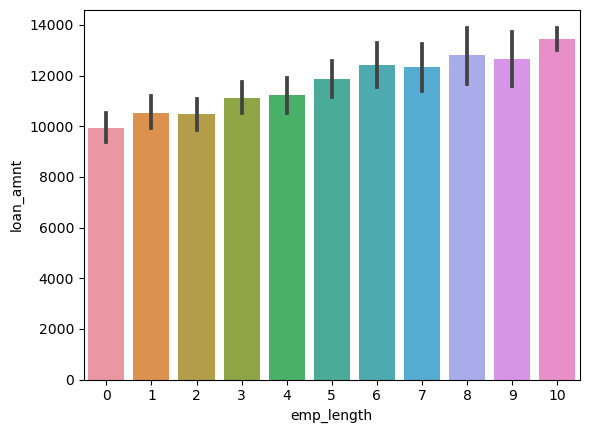

In [80]:
sns.barplot(x='emp_length', y='loan_amnt', data=charged_off)

## Observation based on purpose
- when `purpose` is taken into consideration

 **Charge Off**
 - people with purpose `debt_consolidation` is more likely to default `Charge Off`
 - people with purpose `home_improvement` and annual_inc of `60k-70k` are more likely to default.

In [57]:
keys = sorted(charged_off.purpose.unique())
keys

['car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding']

<AxesSubplot:xlabel='count', ylabel='purpose'>

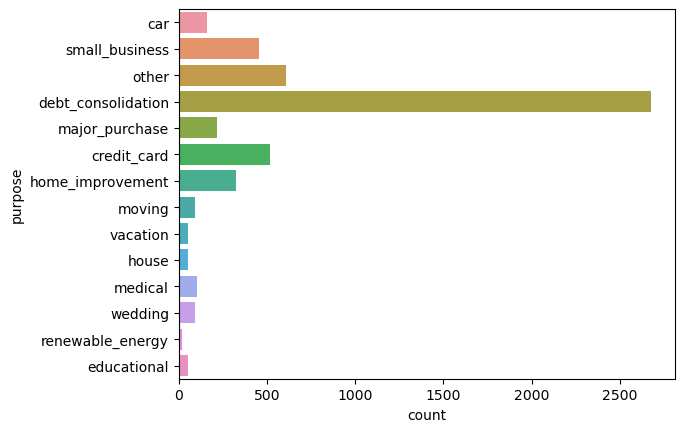

In [58]:
sns.countplot(y='purpose', data=charged_off)

<AxesSubplot:xlabel='annual_inc', ylabel='purpose'>

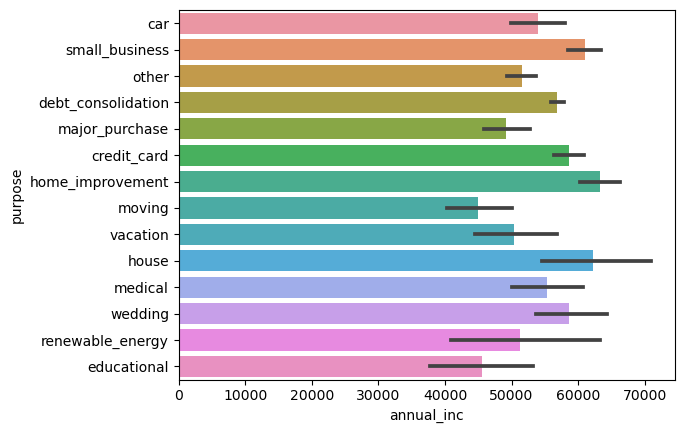

In [59]:
sns.barplot(x='annual_inc', y='purpose', data=charged_off)

## Observation based home_ownership
- when `home_ownership` is taken into consideration

 **Charge Off**
 - people with `RENT` are more likely to default `Charge Off`
 - people with `MORTAGE` and with loan_amnt of `12k-14k` are more likely to default `Charged Off`

In [60]:
charged_off.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

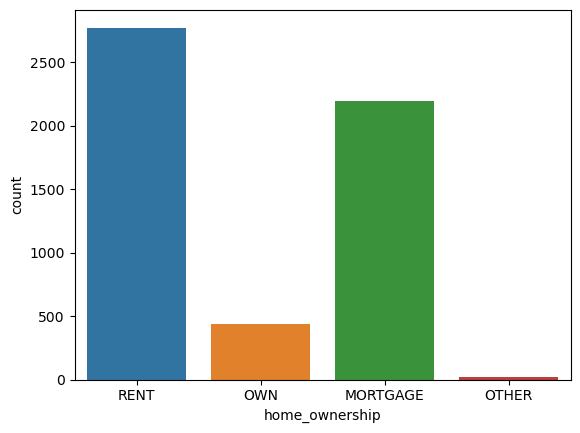

In [61]:
sns.countplot(x='home_ownership', data=charged_off)

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

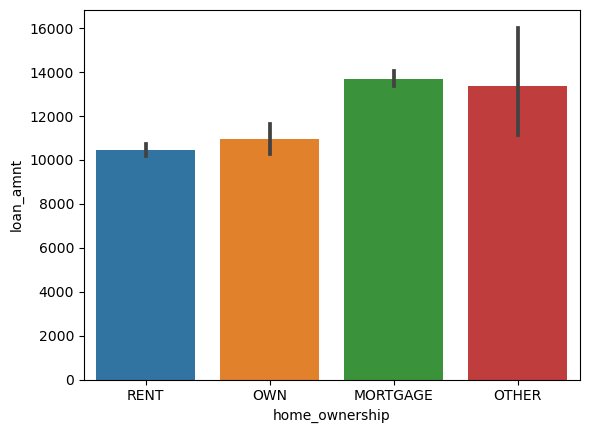

In [78]:
sns.barplot(x='home_ownership', y='loan_amnt', data=charged_off)

## Observation based on grade and sub_grade:
- when `grade` and `sub_grade` are taken into consideration

 **Charge Off**
 - people grade `B` is more likely to default `Charge Off`
 - people sub_grade `B5` is more likely to  default `Charge Off`

In [63]:
order = sorted(charged_off.grade.unique())

<AxesSubplot:xlabel='grade', ylabel='count'>

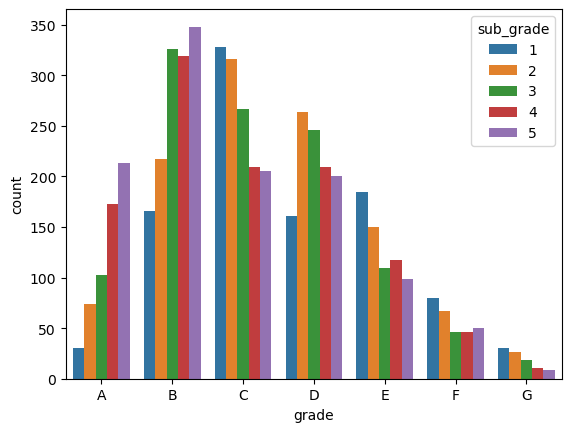

In [64]:
sns.countplot(x='grade', order=order, hue='sub_grade', data=charged_off)

### Uni-Variate Observations
- People with annual income 30k-60k are more likely to default.
- People with sanctioned loan amount of 5k-10k are more likely to default.
- People with term period of 36 months are more likely to default.
- People Not Verified are more likely to default.
- People with interest rate of 13%-17% are more likely to default.
- People with work experience of 10/10+ years are more likely to default.
- People who apply loan for clearing other loan are more likely to default.
- People with RENT are more likely to default.
- People under B5 grade are more likey to default.

### Bi-Variate Observations
- people who sanctioned with 17500 - 20000 and having an annual income of 105k-135k are more likely to default.
- people with loan_amnt 14k-16k with term period of 60 months are more likely to default.
- people with loan_amnt 20k-35k with int_rate of 15%-17% are more likely to default.
- people with 10 years of exp and having 12k-14k loan_amnt are more likely to default.
- people with purpose home_improvement and annual_inc of 60k-70k are more likely to default.
- people with MORTAGE and with loan_amnt of 12k-14k are more likely to default.
- people Verified and with 60k+ annual_inc are more likely to default.

## References
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
2. https://pandas.pydata.org/docs/reference/api/pandas.cut.html